In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
from matplotlib.ticker import ScalarFormatter

In [2]:
inven_data = pd.read_csv('InvenComment_with_label.csv')
steam_data = pd.read_csv('SteamComment_with_label.csv')
youtube_data = pd.read_csv('YoutubeComment_with_label.csv')

In [3]:
inven_data

,date,text,GameName,score,label
0,2020-11-12,정성추 나름 체계적으로 게임이 진행되고있었네요 이런 스토리가,APEX LEGENDS,0.579843,positive
1,2020-11-17,레이스 본명인 는 르네 일거에요두번 째 위에 점 빠진듯,APEX LEGENDS,0.874570,positive
2,2020-11-19,스토리 보는거 정말 좋아하는 이런 정성 넘치는 정리 너무 감사합니다,APEX LEGENDS,0.920417,positive
3,2020-12-15,와 시즌7까지는 어디서 볼 수 있을까요,APEX LEGENDS,0.845297,positive
4,2021-11-05,업뎃내용갱신,APEX LEGENDS,0.498860,negative
...,...,...,...,...,...
449645,2015-02-11,되돌리기가 있으니까 필요없음,히어로즈 오브 더 스톰,0.876470,positive
449646,2015-02-11,이제 이중폭탄웜홀 하나만 까지면 제라툴도 씹사기캐릭에서 그냥 평타캐로 벨런스 맞아질듯,히어로즈 오브 더 스톰,0.465762,negative
449647,2015-02-11,는 용병캠프스틸금지를 제물로 바쳐서 4중폭탄을 소환한다,히어로즈 오브 더 스톰,0.826433,positive
449648,2015-02-11,1 유다이,히어로즈 오브 더 스톰,0.545674,positive


In [4]:
steam_data

,date,text,GameName,score,label
0,2020-11-05,재밌는 게임이 핵쟁이 새끼들 때문에 최단기 퇴물이라는 비운의 타이틀을 얻게 된 게임...,APEX LEGENDS,0.073245,negative
1,2020-12-21,라이브러리 우클릭 입력하면 게임 시작시 소리 사라집니다,APEX LEGENDS,0.122719,negative
2,2021-09-06,서버 관리 안하냐,APEX LEGENDS,0.096111,negative
3,2020-12-03,겜 킬때 뜨는 화면 없애는 법을 찾고 광명을 찾앗습니다 감사합니다,APEX LEGENDS,0.792606,positive
4,2021-10-18,이 게임에서 중국욕 하면 영구정지먹음 이메일로 정지관련 메일을 받았는데 6월30일 ...,APEX LEGENDS,0.047524,negative
...,...,...,...,...,...
56803,2012-05-20,벙어리 체험 게임입니다 이 시대에 착취 되지 않을려면 의견제시는 필수입니다,콜 오브 듀티: 모던 워페어,0.732435,positive
56804,2012-03-31,말이 필요없음 재밋었 멀티에 핑만 빼고,콜 오브 듀티: 모던 워페어,0.770105,positive
56805,2013-06-10,콜옵계의 가장 명작이라면 이것이 아닐까,콜 오브 듀티: 모던 워페어,0.905171,positive
56806,2011-09-24,내 인생을 바꾼 최고의 게임이다 콜 오브 듀티 시리즈 중 가장 뛰어나며 스토리도 가...,콜 오브 듀티: 모던 워페어,0.995886,positive


In [5]:
youtube_data

,date,text,GameName,score,label
0,2015-10-13,갈수록 웃기고 퀄리티도 계속 높아지네 존잼,리그 오브 레전드,0.988250,positive
1,2015-10-13,얘가 솔직히 진짜 매력있는 캐릭턴데 고인,리그 오브 레전드,0.852148,positive
2,2015-10-13,역시 빛돌 빅 무리수 조쿠요 이런 쉰선한 바람이 에 필요하다,리그 오브 레전드,0.417618,negative
3,2015-10-13,갈수록 꿀잼 퀄도 높아지고,리그 오브 레전드,0.967008,positive
4,2015-10-13,역시 김정균 킨드레드템트리를 맞추네,리그 오브 레전드,0.689219,positive
...,...,...,...,...,...
962169,2015-12-03,몬길 몬스터 7성이랑 세나 6성이랑 싸우면 누가 이길까,넷마블 바둑nTV,0.662418,positive
962170,2015-12-03,신맵장난하나 달랑4개만들어놓고못함 모험하라는거야안하라는거야 초월캐릭터만들어서모험돌리...,넷마블 바둑nTV,0.039532,negative
962171,2015-12-03,근데알고보면 몬길이 왜망하는줄아나요 계속7성막주고 그러니깐 망하는거에요 게임하는사람...,넷마블 바둑nTV,0.981278,positive
962172,2015-12-03,와 세나모욕하네 몬스터길들이기 이런 세나모욕하지마라 세나가잘나가는이유 몬길 보다세...,넷마블 바둑nTV,0.096398,negative


## 댓글 기본 정보 시각화

In [13]:
label = ['인벤', '스팀', '유튜브']
comment_count = [len(inven_data.index), len(steam_data.index), len(youtube_data.index)]
game_count = [inven_data['GameName'].nunique(),steam_data['GameName'].nunique(), youtube_data['GameName'].nunique()]

In [2]:
plt.style.use('default')
plt.rc("font", family="Malgun Gothic")

fig, ax1 = plt.subplots(figsize=(8,6))

ax1.plot(label, game_count, '-s', color='red', markersize=4, linewidth=3, alpha=0.7, label='게임 개수')
ax1.set_ylim(0, 70)
ax1.set_yticks(game_count)
ax1.set_ylabel('게임 개수')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(label, comment_count, color='green', label='댓글 수', alpha=0.7, width=0.7)
ax2.set_ylim(0, 1000000)
ax2.set_ylabel(r'댓글 수')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

for i, v in enumerate(label):
    plt.text(v, comment_count[i], comment_count[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='top')    # verticalalignment (top, center, bottom)

plt.show()

NameError: name 'plt' is not defined

<AxesSubplot:>

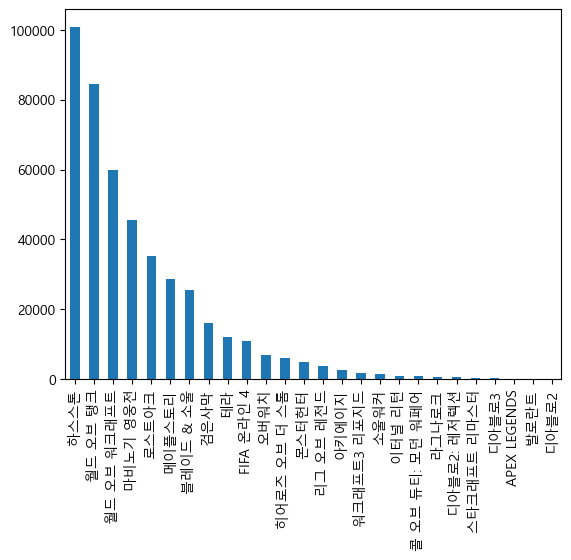

In [8]:
inven_data['GameName'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

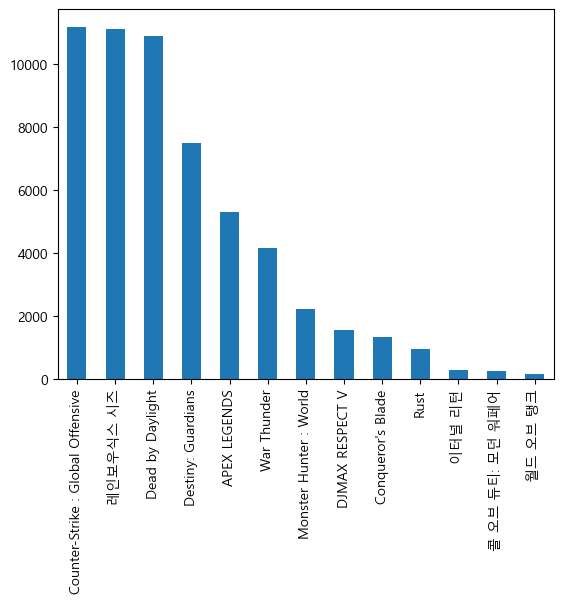

In [9]:
steam_data['GameName'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

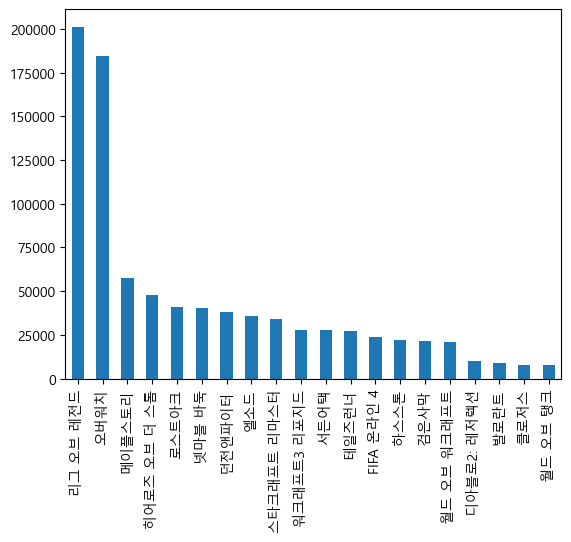

In [105]:
youtube_data['GameName'].value_counts()[:20].plot(kind = 'bar')

## 전체 감성 분석 결과 간단 분석

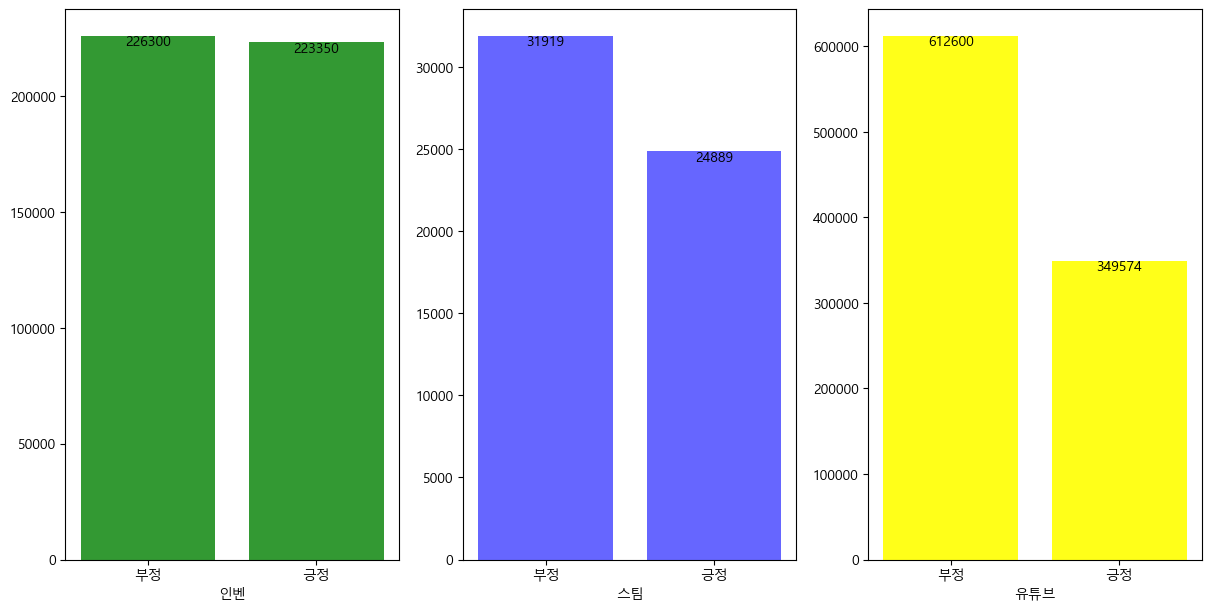

In [11]:
plt.style.use('default')
plt.rc("font", family="Malgun Gothic")

inven_comments = inven_data['label'].value_counts().tolist()
steam_comments = steam_data['label'].value_counts().tolist()
youtube_comments = youtube_data['label'].value_counts().tolist()

fig, axes = plt.subplots(nrows= 1, ncols= 3, figsize=(12,6), constrained_layout=True)

axes[0].bar(['부정', '긍정'], inven_comments, color='green', alpha=0.8, width=0.8)
axes[0].set_xlabel('인벤')
axes[0].text(0, inven_comments[0], inven_comments[0], horizontalalignment='center', verticalalignment='top')
axes[0].text(1, inven_comments[1], inven_comments[1], horizontalalignment='center', verticalalignment='top')

axes[1].bar(['부정', '긍정'], steam_comments, color='blue', alpha=0.6, width=0.8)
axes[1].set_xlabel('스팀')
axes[1].text(0, steam_comments[0], steam_comments[0], horizontalalignment='center', verticalalignment='top')
axes[1].text(1, steam_comments[1], steam_comments[1], horizontalalignment='center', verticalalignment='top')

axes[2].bar(['부정', '긍정'], youtube_comments, color='yellow', alpha=0.9, width=0.8)
axes[2].set_xlabel('유튜브')
axes[2].text(0, youtube_comments[0], youtube_comments[0], horizontalalignment='center', verticalalignment='top')
axes[2].text(1, youtube_comments[1], youtube_comments[1], horizontalalignment='center', verticalalignment='top')

plt.show()

### 게임별 댓글 수 비교

In [70]:
x = inven_data['GameName'].unique()

y = {}
for game in x:
    y[game] = [inven_data[(inven_data['GameName'] == game) & (inven_data['label'] == 'positive')].shape[0],
               inven_data[(inven_data['GameName'] == game) & (inven_data['label'] == 'negative')].shape[0]]


In [89]:
inven_comment_data = pd.DataFrame(y).transpose()
inven_comment_data['GameName'] = inven_comment_data.index

In [91]:
inven_comment_data.columns = ['negative', 'positive', 'GameName']

In [92]:
inven_comment_data = inven_comment_data.sort_values(by= ['negative'], ascending= False)

Text(0.5, 0, '인벤')

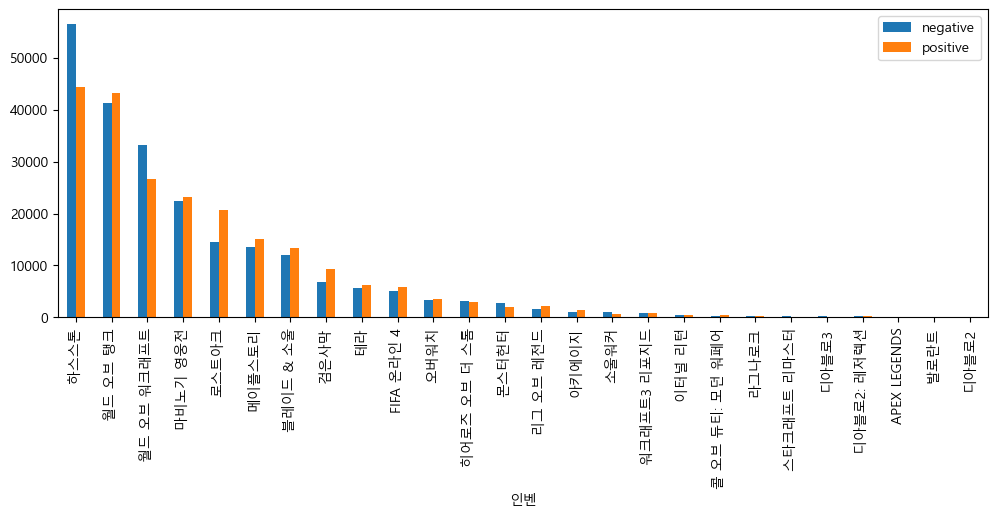

In [113]:
inven_comment_data.plot(x= 'GameName', y= ["negative", "positive"], kind="bar",figsize=(12,4)).set_xlabel('인벤')

Text(0.5, 0, '스팀')

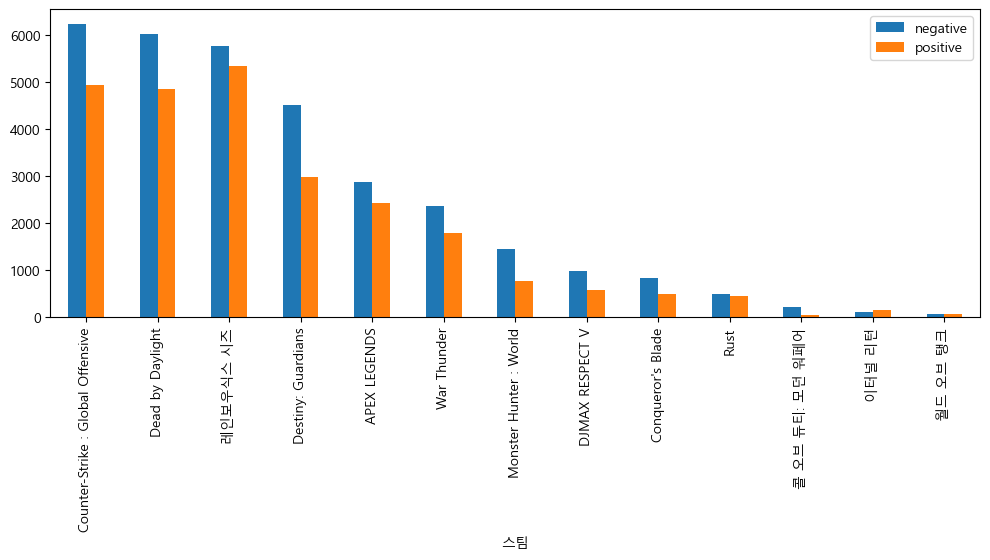

In [114]:
x = steam_data['GameName'].unique()

y = {}
for game in x:
    y[game] = [steam_data[(steam_data['GameName'] == game) & (steam_data['label'] == 'positive')].shape[0],
               steam_data[(steam_data['GameName'] == game) & (steam_data['label'] == 'negative')].shape[0]]

steam_comment_data = pd.DataFrame(y).transpose()
steam_comment_data['GameName'] = steam_comment_data.index

steam_comment_data.columns = ['negative', 'positive', 'GameName']
steam_comment_data = steam_comment_data.sort_values(by= ['negative'], ascending= False)

steam_comment_data.plot(x= 'GameName', y= ["negative", "positive"], kind="bar",figsize=(12,4)).set_xlabel('스팀')

Text(0.5, 0, '유튜브')

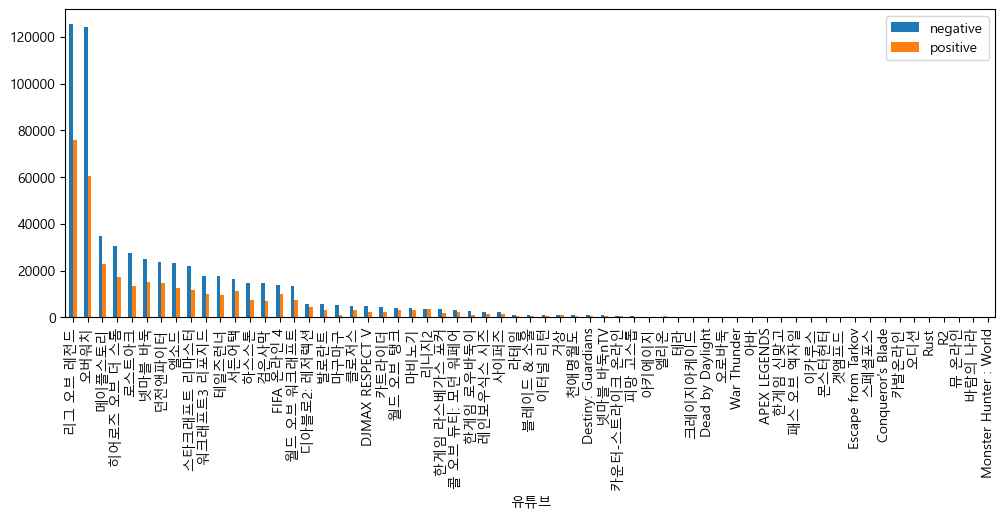

In [115]:
x = youtube_data['GameName'].unique()

y = {}
for game in x:
    y[game] = [youtube_data[(youtube_data['GameName'] == game) & (youtube_data['label'] == 'positive')].shape[0],
               youtube_data[(youtube_data['GameName'] == game) & (youtube_data['label'] == 'negative')].shape[0]]

youtube_comment_data = pd.DataFrame(y).transpose()
youtube_comment_data['GameName'] = youtube_comment_data.index

youtube_comment_data.columns = ['negative', 'positive', 'GameName']
youtube_comment_data = youtube_comment_data.sort_values(by= ['negative'], ascending= False)

youtube_comment_data.plot(x= 'GameName', y= ["negative", "positive"], kind="bar",figsize=(12,4)).set_xlabel('유튜브')

Text(0.5, 0, '유튜브')

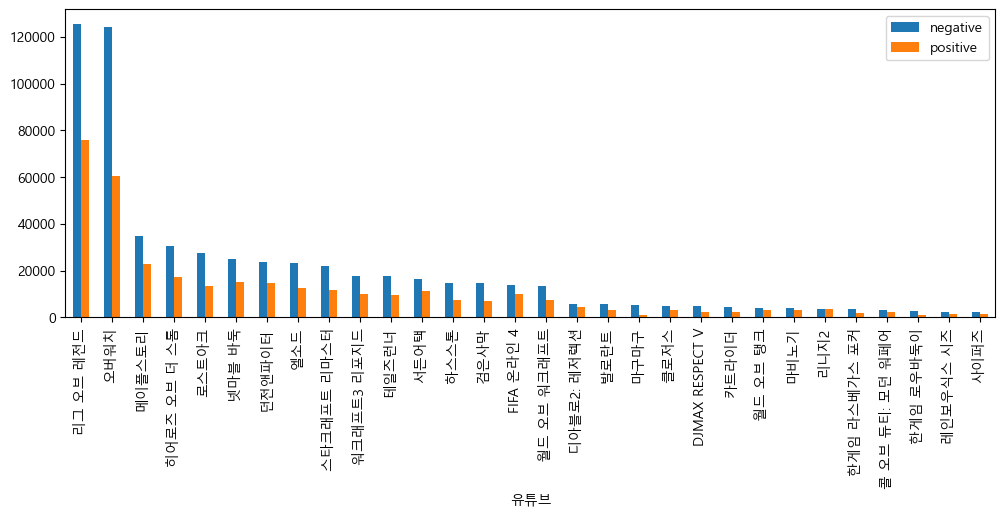

In [116]:
youtube_comment_data[:30].plot(x= 'GameName', y= ["negative", "positive"], kind="bar",figsize=(12,4)).set_xlabel('유튜브')

Text(0.5, 0, '유튜브')

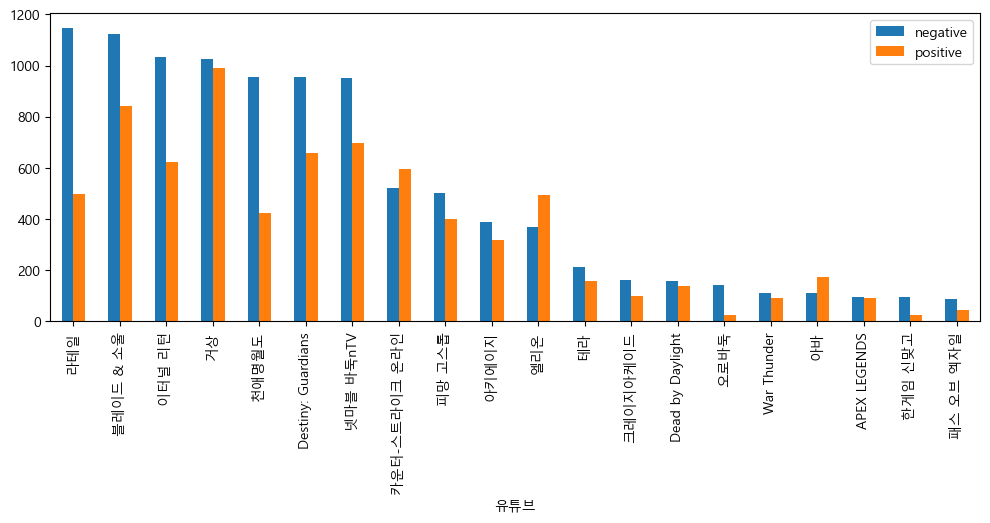

In [117]:
youtube_comment_data[30:50].plot(x= 'GameName', y= ["negative", "positive"], kind="bar",figsize=(12,4)).set_xlabel('유튜브')

Text(0.5, 0, '유튜브')

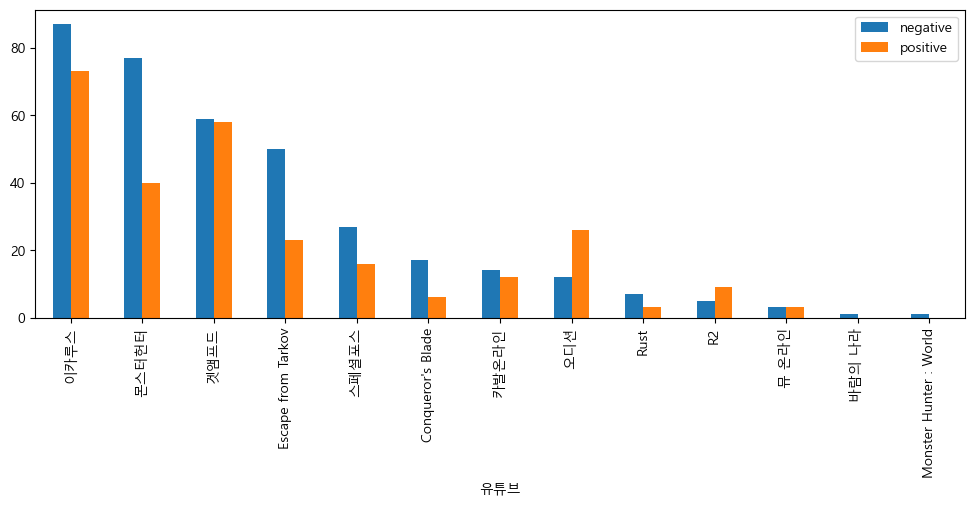

In [118]:
youtube_comment_data[50:].plot(x= 'GameName', y= ["negative", "positive"], kind="bar",figsize=(12,4)).set_xlabel('유튜브')